In [17]:
import pandas as pd
df = pd.read_csv('IBM_HR_Employee_Attrition.csv')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [18]:
df['Attrition'].value_counts(normalize=True)


Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64

<Axes: xlabel='Attrition', ylabel='count'>

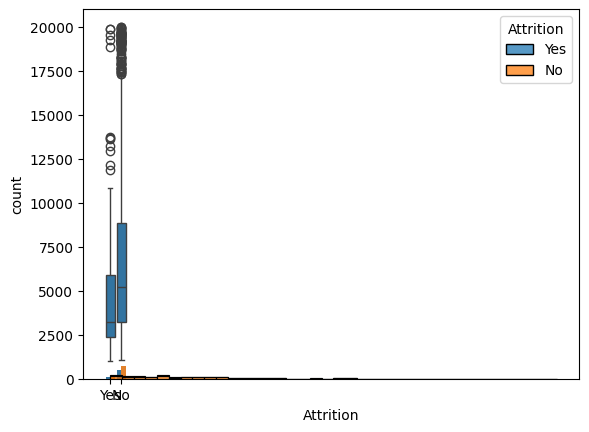

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Attrition', hue='Gender')
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome')
sns.histplot(data=df, x='YearsAtCompany', hue='Attrition', multiple="stack")


<Axes: >

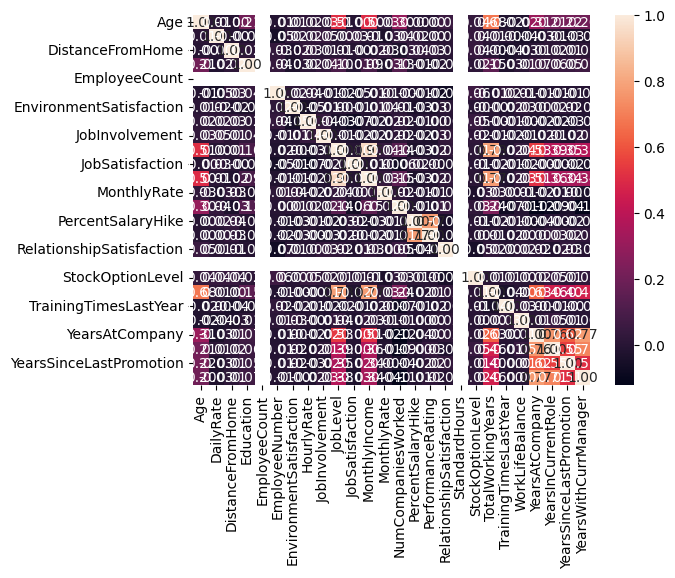

In [20]:
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, fmt=".2f")


In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Encode target
df['Attrition'] = LabelEncoder().fit_transform(df['Attrition'])

# Drop columns not useful (e.g., EmployeeNumber, Over18)
X = df.drop(['Attrition', 'EmployeeNumber', 'Over18', 'EmployeeCount', 'StandardHours'], axis=1)
X = pd.get_dummies(X, drop_first=True)
y = df['Attrition']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)


In [22]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.85      0.97      0.91       370
           1       0.45      0.13      0.20        71

    accuracy                           0.83       441
   macro avg       0.65      0.55      0.55       441
weighted avg       0.79      0.83      0.79       441



In [23]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

           0       0.86      0.98      0.92       370
           1       0.67      0.20      0.30        71

    accuracy                           0.85       441
   macro avg       0.77      0.59      0.61       441
weighted avg       0.83      0.85      0.82       441



e:\University Labs\INTERNSHIP\tasks\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
import shap

# Safe explainer creation
explainer = shap.TreeExplainer(rf, model_output='raw', feature_perturbation='tree_path_dependent')

# Get SHAP values
shap_values = explainer.shap_values(X_test)

# Now check shapes
print("X_test.shape:", X_test.shape)
print("shap_values[1].shape:", shap_values[1].shape)  # Should be (441, 44)

# If still wrong, check full list structure
print("shap_values is a:", type(shap_values))
print("Length of shap_values list:", len(shap_values))




X_test.shape: (441, 44)
shap_values[1].shape: (44, 2)
shap_values is a: <class 'numpy.ndarray'>
Length of shap_values list: 441


In [27]:
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(X_train.values, feature_names=X.columns,
                                 class_names=['Stay', 'Leave'], discretize_continuous=True)
i = 1
exp = explainer.explain_instance(X_test.values[i], rf.predict_proba)

# Save it as an HTML file
with open("lime_explanation.html", "w", encoding="utf-8") as f:
    f.write(exp.as_html())



e:\University Labs\INTERNSHIP\tasks\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
